In the first plot we can observe our prior over w with a mean of [0,0] and a covariance of the identity matrix. Super imposed to it is the posterior distribution, or our updated assumption, over w once we have observed one data point. The following graph show every new posterior over w for every new data point observed. And as expected the mean of the posterior gets closer and closer to w's actual parameters [-1.3, 0.5] and its covariance reduces as we see more data, lowering our uncertainty.

0


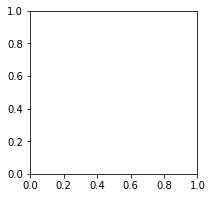

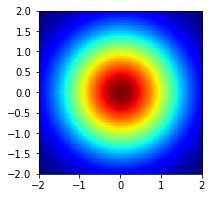

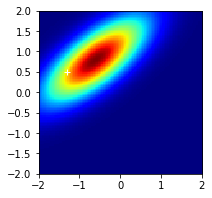

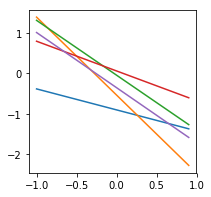

1


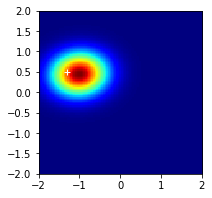

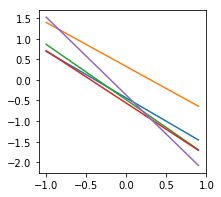

2


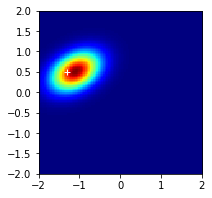

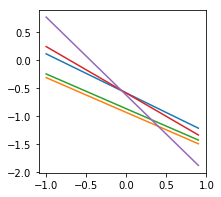

3


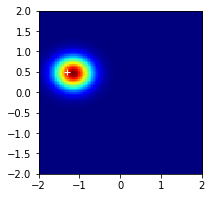

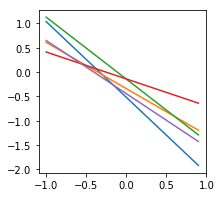

4


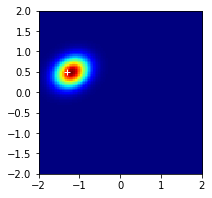

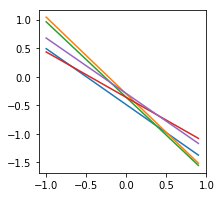

5


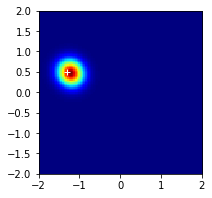

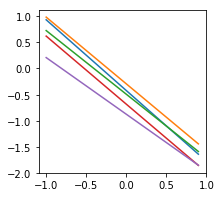

6


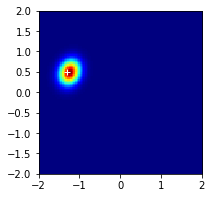

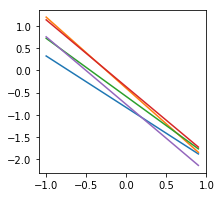

7


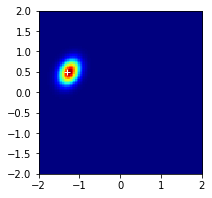

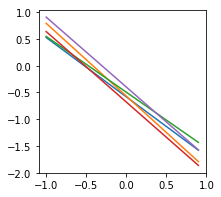

8


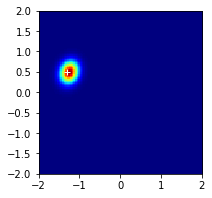

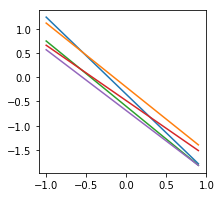

9


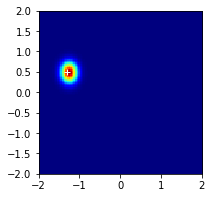

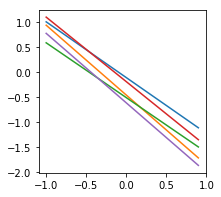

10


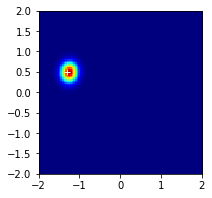

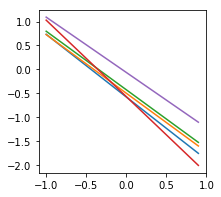

11


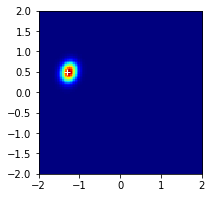

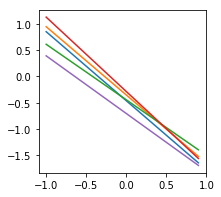

12


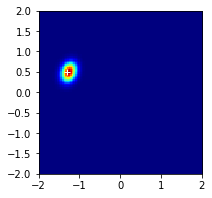

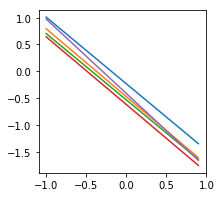

13


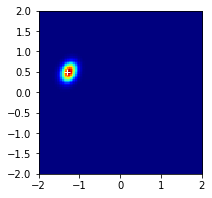

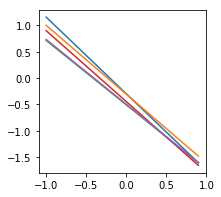

14


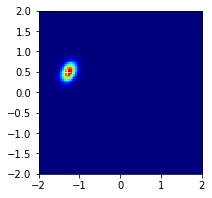

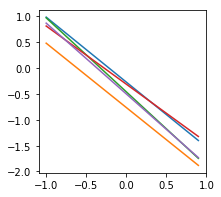

In [46]:
import pylab as py
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal
import numpy.random
from numpy.linalg import inv

#global variables
random_xs = []
y_values = []
w = [-1.3, 0.5]

#Define prior assumptions
identity_matrix = np.identity(2)
prior_w_mean = np.array([0,0])
prior_w_cov = identity_matrix
prior_w = multivariate_normal(prior_w_mean.flatten(), prior_w_cov)

#Plot contour of prior
x = np.linspace(-2, 2, 100)
x1p, x2p = np.meshgrid(x,x)
x1p_flat = x1p.flatten()
x2p_flat = x2p.flatten()
pos = np.vstack((x1p_flat, x2p_flat))
pos = pos.T
Z = prior_w.pdf(pos)
Z = Z.reshape(100,100)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.figure(figsize=(3,3))
plt.imshow(Z,cmap='jet',extent=(-2, 2, -2, 2))
#prior_w_contour = ax.contour(x1p, x2p, Z, 4)
#Generate x and y values
def get_random_xs(n):
    for i in range(0, n):
        index = np.random.randint(0, len(x)-1)
        while x[index] in random_xs:
            index = np.random.randint(1, len(x)-1)
        random_x = x[index]
        random_xs.append(random_x)
    return random_xs

def generate_y_value(random_xs, i):
    for j, value in enumerate(random_xs):
        if i == j:
            y = value*w[0] - w[1]
            y_values.append(y)
    Y = np.array([y_values])
    Y = Y.T
    return Y

#Turn random_xs into matrix with ones
def generate_x_and_ones_matrix(random_xs):
    arr_x = np.array([random_xs])
    arr_x = arr_x.T
    ones = np.array([np.ones(len(random_xs))])
    ones = ones.T
    x_and_ones = np.concatenate((arr_x, ones), axis=1)
    return x_and_ones
  
def sample_functions(ws, X, Y):
    ax = plt.gca()
    x = np.arange(-1.0, 1.0, 0.1)
    for i, (w0,w1) in enumerate(ws):
        """
        x_values = []
        y_values = []
        for j in range(0,5):
            index = np.random.randint(0, len(x)-1)
            while x[index] in random_xs:
                index = np.random.randint(1, len(x)-1)
            random_x = x[index]
            x_values.append(random_x)
            y = val[0]*random_x + val[1]
            y_values.append(y)
        """
        plt.plot(x,w0*x + w1)
        #plt.plot(X, Y, 'ro-')
    plt.show()

def posterior_covariance(X, prior_cov):
    posterior_per = (1/(0.3))*np.dot(X.T, X) + inv(prior_cov)
    posterior_cov = inv(posterior_per)
    return posterior_cov

def generate_posterior_mean(X, Y, posterior_cov):
    posterior_mean = (1/(0.3))*np.dot(posterior_cov, np.dot(X.T, Y))
    return posterior_mean
    
def posterior(posterior_mean, posterior_cov):
    posterior_w = multivariate_normal(posterior_mean.flatten(), posterior_cov)
    return posterior_w
    
def generate_posterior(n):
    prior_cov = np.identity(2)
    for i in range(0, n):
        xs = get_random_xs(1)
        X = generate_x_and_ones_matrix(xs)
        Y = generate_y_value(xs, i)
        posterior_cov = posterior_covariance(X, prior_cov)
        posterior_mean = generate_posterior_mean(X, Y, posterior_cov)
        posterior_w = posterior(posterior_mean, posterior_cov)
        """
        print("cov")
        print(posterior_cov)
        
        print("mean")
        print(posterior_mean)
        
        #prior_cov = posterior_cov
        #Plot contour of posterior
        print(posterior_w)
        """
        print(i)
        Z_posterior = posterior_w.pdf(pos)
        Z_posterior = Z_posterior.reshape(100,100)
        plt.figure(figsize=(3,3))
        plt.imshow(Z_posterior,cmap='jet',extent=(-2, 2, -2, 2))
        plt.plot(w[0], w[1], 'w+')
        plt.show()
        list_of_ws = np.random.multivariate_normal(posterior_mean.flatten(), posterior_cov, 5)
        plt.figure(figsize=(3,3))
        sample_functions(list_of_ws, X, Y)
    return posterior_w

posterior_w = generate_posterior(15) #parameter is nbr of data points

#Plot contour for posterior of w given datapoints
#plt.show()

##### 

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (3,3)